In [1]:
import scanpy as sc
import numpy as np
import random
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

data_path = "E:/STOmics/JT1-B04654A1-SAW-Count-Output/analysis/"
adata = sc.read_h5ad(data_path + "B04654A1.cellbin_1.0.h5ad")

In [2]:
adata

AnnData object with n_obs × n_vars = 80291 × 30613
    obs: 'dnbCount', 'area', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'leiden', 'orig.ident', 'x', 'y'
    var: 'real_gene_name', 'n_cells', 'n_counts', 'mean_umi', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bin_size', 'bin_type', 'gene_exp_leiden', 'hvg', 'leiden_resolution', 'neighbors', 'omics', 'pca_variance_ratio', 'rank_genes_groups', 'resolution', 'sn'
    obsm: 'X_pca', 'X_umap', 'cell_border', 'spatial'
    obsp: 'connectivities', 'distances'

array([[<Axes: title={'center': 'total_counts'}>]], dtype=object)

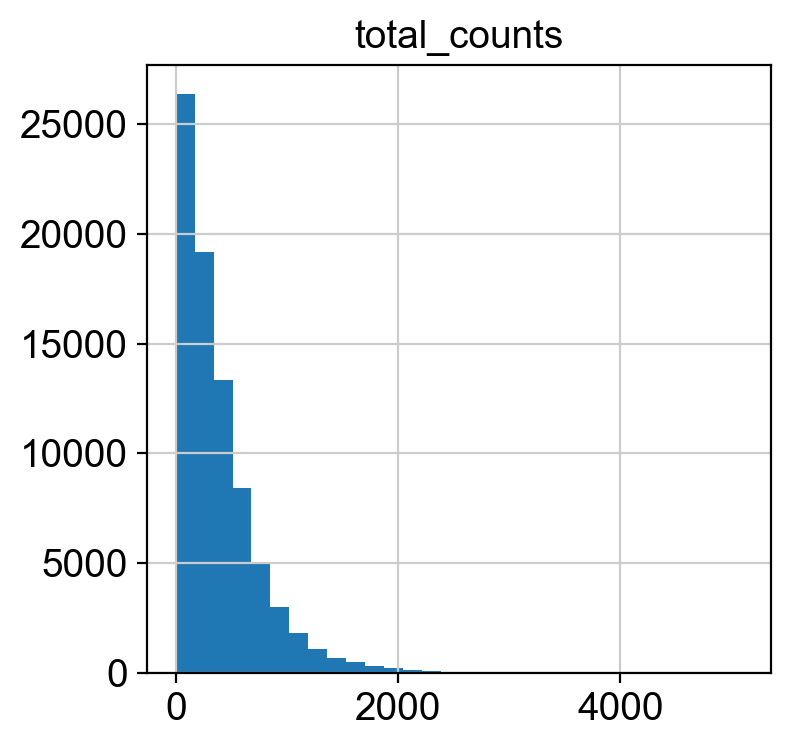

In [5]:
adata.obs[["total_counts"]].hist(bins=30)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


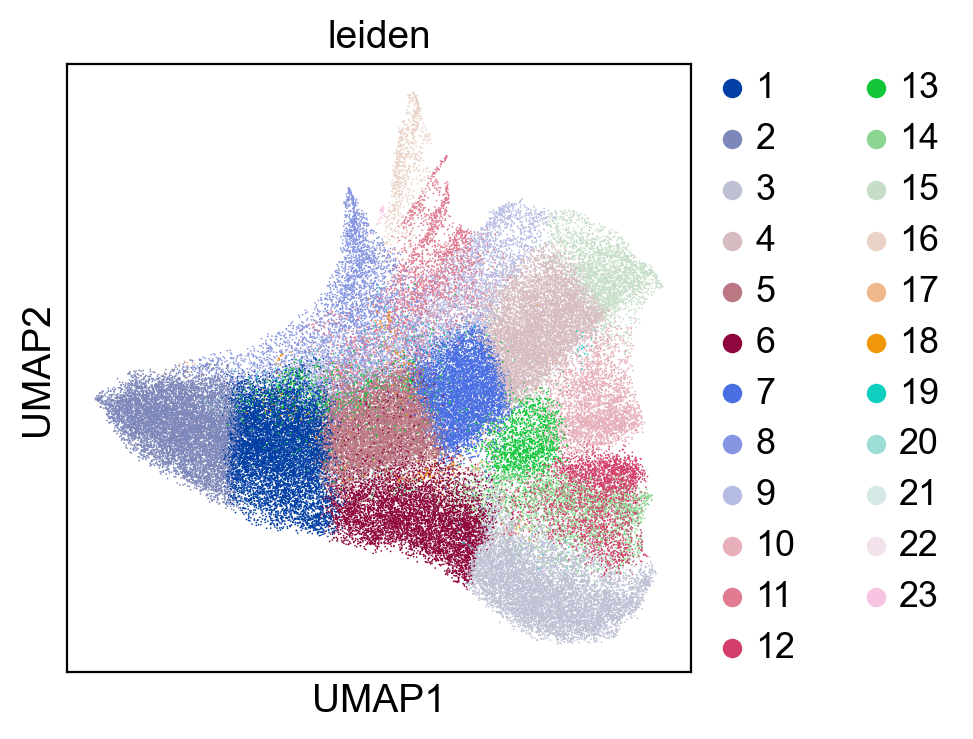

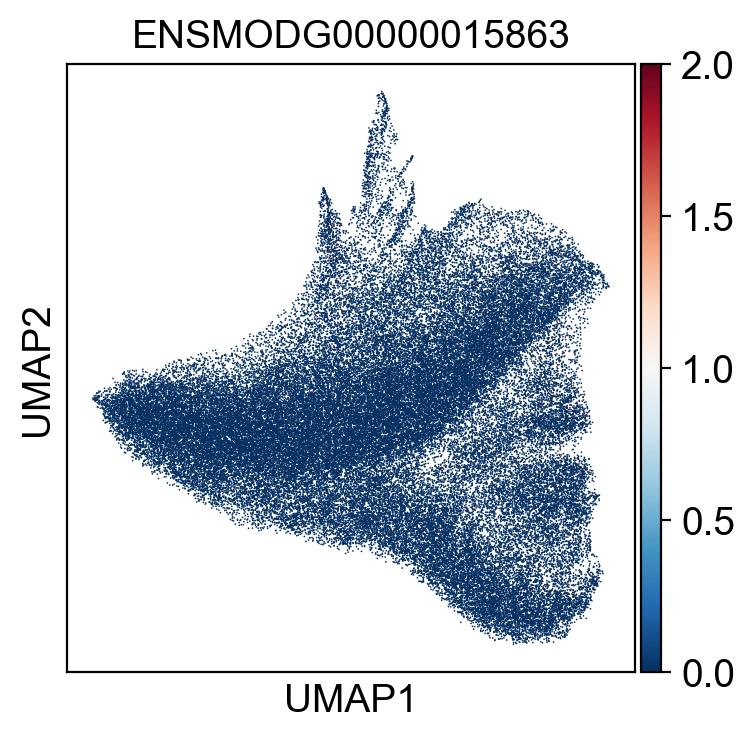

In [6]:
sc.pl.umap(adata, color="leiden")
sc.pl.umap(adata, color="ENSMODG00000015863", vmax=2, color_map="RdBu_r")

In [37]:
from scipy.sparse import csc_matrix
from scipy.io import mmwrite
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

path = "E:/STOmics/seurat/raw/"
bcs = adata.obs.index.to_frame()
gns = adata.var.index.to_frame()
X = adata.raw.X
mmwrite(path + "matrix.mtx", csc_matrix(X, dtype=np.int64).T, precision=1)
gns.to_csv(path + "features.tsv", index=False, header=False)
bcs.to_csv(path + "barcodes.tsv", index=False, header=False)
adata.obs[["x"]].to_csv(path + "x_coords.csv", index=False, header=False)
adata.obs[["y"]].to_csv(path + "y_coords.csv", index=False, header=False)
for fl in ["matrix.mtx", "features.tsv", "barcodes.tsv"]:
    compress_file(path + fl, path + fl + ".gz")

In [4]:
import pandas as pd

path = "E:/STOmics/seurat/Opossum/raw/"
bcs = pd.read_csv(path + "barcodes.tsv", header=None, names=["barcodes"])
X = pd.read_csv(path + "x_coords.csv", header=None, names=["X"])
Y = pd.read_csv(path + "y_coords.csv", header=None, names=["Y"])
coords = pd.concat((bcs, X, Y), axis=1)
coords.to_csv(path + "coords.tsv", index=False, header=True)
compress_file(path + "coords.tsv", path + "coords.tsv" + ".gz")

In [3]:
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)